<a href="https://colab.research.google.com/github/Rohit909-creator/Rohit909-creator/blob/main/AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
from torchvision import datasets,transforms
import matplotlib.pyplot as pt

In [ ]:
transform = transforms.ToTensor()

mnist = datasets.MNIST(root = './data',train = True,download = True,transform = transform)

dataloader = torch.utils.data.DataLoader(dataset = mnist,
                                         batch_size=64,
                                         shuffle = True)



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
dataiter = iter(dataloader)
images,labels = dataiter.next()
print(torch.min(images),torch.max(images))


tensor(0.) tensor(1.)


In [ ]:
class AutoEncoder(nn.Module):

  def __init__(self):
    super().__init__()
    
    self.encoder = nn.Sequential(
        nn.Linear(28*28,128),
        nn.ReLU(),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Linear(64,12),
        nn.ReLU(),
        nn.Linear(12,6)  # N * 3

    )


    self.decoder = nn.Sequential(
        nn.Linear(6,12),
        nn.ReLU(),
        nn.Linear(12,64),
        nn.ReLU(),
        nn.Linear(64,128),
        nn.ReLU(),
        nn.Linear(128,28*28),  # N * 3
        nn.Sigmoid()
    )


  def forward(self,x):
    
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    # Note if [-1,1] use Tanh
    return decoded


In [ ]:
model = AutoEncoder().cuda()

criterion = nn.MSELoss()

optimizer = torch.optim.Adam(model.parameters(),lr = 1e-2)


In [ ]:
num_epochs = 10
outputs = []

for epoch in range(num_epochs):
  for (img,_) in dataloader:
    img = img.reshape(-1,28*28).cuda()
    recon = model(img)
    loss = criterion(recon,img)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  print(f'Epoch:{epoch}, Loss:{loss.item():.4f}')
  outputs.append((epoch,img,recon))



Epoch:0, Loss:0.0445
Epoch:1, Loss:0.0305
Epoch:2, Loss:0.0282
Epoch:3, Loss:0.0232
Epoch:4, Loss:0.0209
Epoch:5, Loss:0.0240
Epoch:6, Loss:0.0275
Epoch:7, Loss:0.0262
Epoch:8, Loss:0.0293
Epoch:9, Loss:0.0302


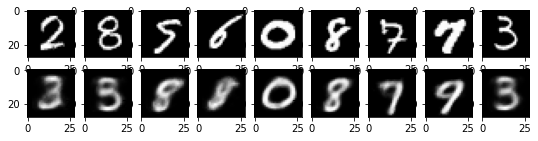

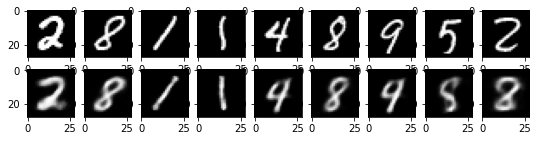

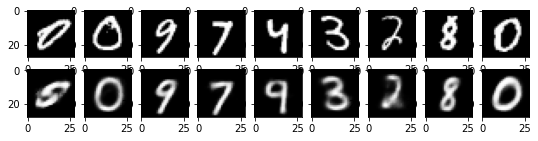

In [ ]:
for k in range(0,num_epochs,4):
  pt.figure(figsize = (9,2))
  pt.gray()
  imgs = outputs[k][1].cpu().detach().numpy()
  recon = outputs[k][2].cpu().detach().numpy()
  for i, item in enumerate(imgs):
    if i >= 9: break
    pt.subplot(2,9,i+1) # row length +i +1
    item = item.reshape(-1,28,28)
    pt.imshow(item[0])

  for i, item in enumerate(recon):
    if i >= 9: break
    pt.subplot(2,9,9+i+1) # row length +i +1
    item = item.reshape(-1,28,28)
    pt.imshow(item[0])

  

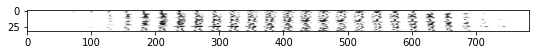

In [ ]:
recon = outputs[len(outputs)][2].cpu().detach().numpy()
pt.figure(figsize = (9,2))
pt.imshow(recon,cmap = "Greys")
pt.show()

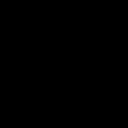

In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np
recon = cv2.resize(recon,(128,128))
cv2_imshow(recon)


In [ ]:
data,labels = dataiter.next()

tensor([2, 8, 2, 8, 6, 2, 1, 6, 4, 9, 5, 9, 0, 5, 1, 5, 9, 9, 3, 7, 6, 2, 4, 4,
        1, 6, 6, 3, 3, 0, 3, 8, 5, 2, 8, 8, 8, 7, 6, 8, 9, 8, 9, 6, 6, 6, 8, 0,
        2, 0, 8, 3, 6, 0, 1, 9, 4, 8, 1, 7, 8, 9, 2, 2])